In [10]:
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
# sys.path = ['/hps/nobackup/research/stegle/users/willj/GTEx/deps/qvalue/qvalue'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
import os
%matplotlib inline
import qvalue

In [14]:
component = 5
tissue = 'Lung'

# 'data/processed/association_results/expression/inception_50_-1.h5/Lung/mean/component1_sh{}_fl0.py'.format(component)
real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,component),'rb'))[1])
shuffled_data = pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh1_fl0.py'.format(tissue,component),'rb'))
shuffled_idx = np.array(shuffled_data[0])
shuffled_pvalues = np.array(shuffled_data[1])
[X_matrix, y_pheno] = pickle.load(open('../data/processed/association_data/expression/inception_50_-1.h5/small/{}/X_y_mean'.format(tissue),'rb'))

In [15]:
len(real_pvalues)

28683

In [5]:
number_transcripts = 28683
number_components = 1024

In [8]:
available_tissues = ['Liver', 'Lung', 'Testis','Ovary','Stomach']
tensor = np.zeros(shape=(len(available_tissues), number_components, number_transcripts))

for t, tissue in enumerate(available_tissues[1:2]):
    print (tissue)
    for c in range(10):
        if c%100 == 0:
            print (c)
        real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,c),'rb'))[1])
        print (len(real_pvalues))
    
#         tensor[t,c,:] = real_pvalues

Lung
0
28683
28683
28683
28683
28683
28683
28683
28683
28683
28683


In [24]:
for tissue in available_tissues:
    [X_matrix, y_pheno] = pickle.load(open('../data/processed/association_data/expression/inception_50_-1.h5/small/{}/X_y_mean'.format(tissue),'rb'))
    print (tissue,X_matrix.shape)

Liver (96, 22866)
Lung (277, 28683)
Testis (153, 35670)
Ovary (82, 24860)
Stomach (167, 26021)


In [5]:
GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'

In [6]:
A = np.zeros(shape=(1024,28683))
tissue = 'Lung'
for c in range(1024):
    if c % 100 == 0:
        print (c)
    real_pvalues = np.array(pickle.load(open(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,c),'rb'))[1])    
    A[c,:] = real_pvalues

0
100
200
300
400
500
600
700
800
900
1000


In [16]:
def distance(x,y):
    dist = 1- pearsonr(x,y)[0]
    return dist

In [17]:
D = np.zeros([1024,1024])
for i in range(1024):
    if i%100 == 0:
        print (i)
    for j in range(1024):
        D[i,j] = distance(A[i,:], A[j,:])


0
100
200
300
400
500
600
700
800
900
1000


In [107]:
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)

0
100
200
300
400
500
600
700
800
900
1000


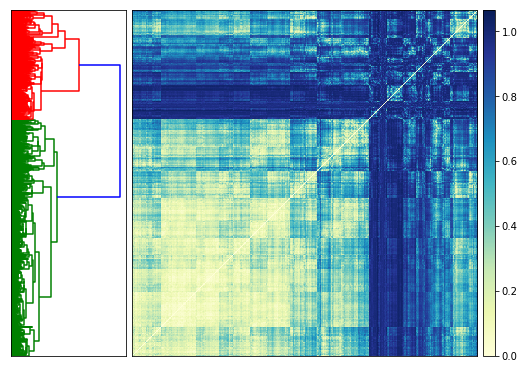

In [19]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate random features and distance matrix.

def distance(x,y):
    dist = 1 - pearsonr(x,y)[0]
    return dist

D = np.zeros([1024,1024])
for i in range(1024):
    if i%100 == 0:
        print (i)
    for j in range(1024):
        D[i,j] = distance(A[i,:], A[j,:])

Dc = D.copy()
# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(Dc, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
# ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
# Y = sch.linkage(D, method='ward')
# Z2 = sch.dendrogram(Y)
# ax2.set_xticks([])
# ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
# idx2 = Z2['leaves']
Dc = Dc[idx1,:]
Dc = Dc[:,idx1]
# D = D[:,idx2]
im = axmatrix.matshow(Dc, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
# fig.show()
# fig.savefig('dendrogram.png')

In [41]:
tissue_filename = "Lung"
tissue_expression_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/ExpressionFiles/phe000006.v2.GTEx_RNAseq.expression-data-matrixfmt.c1/parse_data/44_tissues/GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_gene_rpkm_{}_normalised_without_inverse_gene_expression.txt'.format(tissue_filename)
with open(tissue_expression_filepath, 'r') as f:
    expression_table = np.array([x.split('\t') for x in f.read().splitlines()])
np.argsort(real_pvalues)[0:10]

array([22778, 19885, 12667,  8885, 13006,  5481,  5842,  5338, 27156, 22660])

In [63]:
tissue_transcript_counter = {}
transcript_counter = dict([(x,0) for x in expression_table[1:,0]])
tissue_transcript_counter['Lung'] = transcript_counter.copy()
tissue_transcript_counter['Liver'] = transcript_counter.copy()
tissue_transcript_counter['Ovary'] = transcript_counter.copy()

In [64]:
for tissue in ['Lung', 'Liver','Ovary']:
    current_transcript_counter = tissue_transcript_counter[tissue]
    print (tissue)
    for c in range(1024):
        if c % 100 == 0:
            print (c)
        real_pvalues = np.array(pickle.load(open('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,c),'rb'))[1])
        top_five_pvalues = expression_table[1:,0][np.argsort(real_pvalues)[0:5]]
        for pvalue in top_five_pvalues:
            current_transcript_counter[pvalue] += 1


Lung
0
100
200
300
400
500
600
700
800
900
1000
Liver
0
100
200
300
400
500
600
700
800
900
1000
Ovary
0
100
200
300
400
500
600
700
800
900
1000


## Transcript counts

In [66]:
for tissue in tissue_transcript_counter.keys():
    transcript_counts = list(tissue_transcript_counter[tissue].items())
    transcript_counts.sort(key=lambda x: x[1],reverse=True)
    print (transcript_counts[0:5])

[('ENSG00000124615.13', 581), ('ENSG00000196793.9', 504), ('ENSG00000168005.4', 458), ('ENSG00000099385.7', 379), ('ENSG00000161958.6', 359)]
[('ENSG00000188827.6', 182), ('ENSG00000261742.1', 145), ('ENSG00000204934.6', 141), ('ENSG00000266077.1', 132), ('ENSG00000254911.2', 131)]
[('ENSG00000204176.9', 502), ('ENSG00000164776.5', 391), ('ENSG00000103811.11', 368), ('ENSG00000267654.1', 231), ('ENSG00000179627.9', 222)]


## Common transcript names

In [86]:
from pyensembl import EnsemblRelease
# release 77 uses human reference genome GRCh38
data = EnsemblRelease(77)

for tissue in tissue_transcript_counter.keys():
    transcript_counts = list(tissue_transcript_counter[tissue].items())
    transcript_counts.sort(key=lambda x: x[1],reverse=True)
    print (tissue, [data.gene_name_of_gene_id(x[0].split('.')[0]) for x in transcript_counts[0:5]])
    

Liver ['MOCS1', 'ZNF239', 'C11orf84', 'BCL7C', 'FGF11']
Ovary ['SLX4', 'LINC00922', 'ATP6V0E2-AS1', 'AC139149.1', 'SCARNA9']
Lung ['SYT15', 'PHKG1', 'CTSH', 'RP11-973H7.4', 'ZBTB42']


In [91]:
for x in ['MOCS1', 'ZNF239', 'C11orf84', 'BCL7C', 'FGF11']:
    print (x)

MOCS1
ZNF239
C11orf84
BCL7C
FGF11


In [92]:
for x in ['SYT15', 'PHKG1', 'CTSH', 'RP11-973H7.4', 'ZBTB42']:
    print (x)

SYT15
PHKG1
CTSH
RP11-973H7.4
ZBTB42


In [90]:
from gprofiler import GProfiler
gp = GProfiler("MyTool/0.1")
gp.gprofile(['SLX4', 'LINC00922', 'ATP6V0E2-AS1', 'AC139149.1', 'SCARNA9'])

[[1,
  True,
  0.05,
  1,
  1,
  1,
  1.0,
  1.0,
  'OMIM:613951',
  'omi',
  1,
  'FANCONI ANEMIA, COMPLEMENTATION GROUP P; FANCP',
  1,
  'SLX4']]

In [68]:
pyensembl.gene_name_of_transcript_id(transcript_id)

AttributeError: module 'pyensembl' has no attribute 'gene_name_of_transcript_id'